# 🏆 The Best Neighborhood in Pittsburgh

## Team Name: Group 33
**Group Members:**
* Anthony Hoang ([alh549@pitt.edu](mailto:alh549@pitt.edu))
* Youssef Bey ([yob27@pitt.edu](mailto:yob27@pitt.edu))
* Andrew Malfregeot ([ajm620@pitt.edu](mailto:ajm620@pitt.edu))
* Allan Verkhov ([alv182@pitt.edu](mailto:alv182@pitt.edu))

![My GIF](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExYTRlMGhsc2U1anJuaWo0dXB1ajVncXl3MzJjcmp3bzl5dGd4MnRsNyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Mp37ahivpzR3PK8PIZ/giphy.gif)

## 1. Introduction: How We Defined "Best"

> ****

For this project, our group was tasked with finding the "best" neighborhood in Pittsburgh. Since "best" is a subjective term, we decided to create our own data-driven metric to define it.

We decided to define "best" as the neighborhood with the **highest quality of life and the best community/family resources.**

To measure this, we created a custom metric we call the **"Community Wellness Score."** Each of us was responsible for analyzing one sub-metric that contributes to this overall score.

## 2. The Metric: Our "Community Wellness Score"

> ****

Our "Community Wellness Score" is a combined score based on four sub-metrics, each analyzed using a different dataset from the WPRDC.

1.  **School Enrollment (Anthony):** A high ratio of school enrollment shows a strong educational focus and family presence.
    * **Dataset:** [School Enrollment by Neighborhood](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-school-enrollment/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f)

2.  **Playgrounds (Youssef):** The number of public playgrounds is a great indicator of a family-friendly community.
    * **Dataset:** [City of Pittsburgh Playgrounds](https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367)

3.  **Pools (Andrew):** Public pools are a key community resource for recreation, health, and fun.
    * **Dataset:** [City of Pittsburgh Pools](https://data.wprdc.org/dataset/city-pools)

4.  **Median Age at Death (Allan):** Used as a proxy for a neighborhood's overall health and long-term quality of life. A higher age is better.
    * **Dataset:** [Median Age at Death by Neighborhood](https://data.wprdc.org/dataset/median-age-death/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2)

### How We Combine Them: The Rank Score

To create our single metric, we decided to use a **Rank Score**.

Here's how it works:
1.  **We rank all neighborhoods** (from 1 to 90+) for *each* of our four metrics, sorting them from best to worst.
2.  **"Best" (Rank 1) is defined by the metric:**
    * **School Rank 1:** Highest enrollment ratio.
    * **Playground Rank 1:** Most playgrounds.
    * **Pool Rank 1:** Most pools.
    * **Age at Death Rank 1:** Highest median age at death.
3.  **We add those ranks together** for each neighborhood:

`Final_Score = (School Rank) + (Playground Rank) + (Pool Rank) + (Age at Death Rank)`

**This means the neighborhood with the lowest total score is our winner.** A neighborhood that ranks 1st, 5th, and 10th (Final Score: 16) is better than a neighborhood that ranks 30th, 40th, and 20th (Final Score: 90).

In [2]:
# 1. Setup: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This line helps our plots show up in the notebook
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


## 3. The Analysis: Calculating the "Best" Neighborhood

> ****

Here is the complete analysis. We load each of our four datasets, clean them up, and merge them on the neighborhood name. We then calculate the rank for each metric and add them together to get our final score.

In [5]:
#  3.1: Load and Process All Four Datasets 
import pandas as pd
import numpy as np

#  Anthony's School Enrollment Metric 
school_url = "https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv"
school_df = pd.read_csv(school_url)
# Calculate the enrollment ratio
school_df['Enrollment Ratio'] = school_df["Estimate; Enrolled in school:"] / school_df["Estimate; Total:"]
# Create the final metric dataframe
final_school_metric = school_df[['Neighborhood', 'Enrollment Ratio']].copy()
# Standardize neighborhood name for merging
final_school_metric['neighborhood'] = final_school_metric['Neighborhood'].str.title()


#  Youssef's Playground Metric 
playgrounds_url = 'https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367'
playgrounds_df = pd.read_csv(playgrounds_url)
# Group by neighborhood and count playgrounds
final_playground_metric = playgrounds_df.groupby('neighborhood').size().to_frame('playground_count')
# Standardize neighborhood name for merging (reset_index and rename)
final_playground_metric = final_playground_metric.reset_index()
final_playground_metric['neighborhood'] = final_playground_metric['neighborhood'].str.title()


#  Andrew's Pool Metric 
pools_url = "https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a"
pools_df = pd.read_csv(pools_url)
# Filter for only "Pool" types
pools_only = pools_df[pools_df["type"].str.lower() == "pool"]
# Group by neighborhood and count pools
final_pool_metric = pools_only.groupby("neighborhood").size().to_frame('pool_count')
# Standardize neighborhood name for merging
final_pool_metric = final_pool_metric.reset_index()
final_pool_metric['neighborhood'] = final_pool_metric['neighborhood'].str.title()


#  Allan's Age at Death Metric 
deaths_url = "https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv"
deaths_df = pd.read_csv(deaths_url)
# Clean column names
deaths_df.columns = deaths_df.columns.str.strip().str.lower().str.replace(" ", "_")
# Calculate the average median age
deaths_df["average_median_age"] = deaths_df[["black_md_age_at_death", "white_md_age_at_death"]].mean(axis=1)
# Create the final metric dataframe
final_age_metric = deaths_df[['neighborhood', 'average_median_age']].copy()
# Standardize neighborhood name for merging
final_age_metric['neighborhood'] = final_age_metric['neighborhood'].str.title()


#  3.2: Combine All Metrics 

# Start with the school metric and merge the others
combined_df = pd.merge(final_school_metric, final_playground_metric, on='neighborhood', how='outer')
combined_df = pd.merge(combined_df, final_pool_metric, on='neighborhood', how='outer')
combined_df = pd.merge(combined_df, final_age_metric, on='neighborhood', how='outer')

# Handle missing data: fill NaNs with 0 (which will give them the worst rank)
combined_df = combined_df.fillna(0)


#  3.3: Calculate the Final "Rank Score" 

# Create rank columns. ascending=False means a HIGHER value (like more pools) gets rank #1.
combined_df['school_rank'] = combined_df['Enrollment Ratio'].rank(ascending=False)
combined_df['play_rank'] = combined_df['playground_count'].rank(ascending=False)
combined_df['pool_rank'] = combined_df['pool_count'].rank(ascending=False)
combined_df['age_rank'] = combined_df['average_median_age'].rank(ascending=False)

# Calculate the Final Score by adding the ranks
combined_df['FINAL_SCORE'] = combined_df['school_rank'] + combined_df['play_rank'] + combined_df['pool_rank'] + combined_df['age_rank']

# Sort by the FINAL_SCORE (ascending=True means the LOWEST score is #1)
final_ranking = combined_df.sort_values(by='FINAL_SCORE', ascending=True)

# Display the Top 10 Winners
print(" FINAL RANKING (Top 10) ")
# Show the relevant columns for our presentation
print(final_ranking[['neighborhood', 'FINAL_SCORE', 'school_rank', 'play_rank', 'pool_rank', 'age_rank']].head(10))

FINAL RANKING (Top 10)
                neighborhood  FINAL_SCORE  school_rank  play_rank  pool_rank  \
84       Squirrel Hill South         32.5         19.0        1.0       10.5   
41             Highland Park         61.0         24.0        5.5        1.5   
1           Allegheny Center         74.0         21.0        5.5       10.5   
74             South Oakland        102.0          5.0       11.5       59.5   
73                  Sheraden        108.5         27.0        5.5       10.5   
48  Lincoln-Lemington-Belmar        111.0         20.0       22.5       59.5   
20           Central Oakland        112.5          1.0       49.0       59.5   
10                Bloomfield        114.0         38.0       22.5       10.5   
47             Lincoln Place        120.0         76.0       22.5       10.5   
96              West Oakland        125.5          7.0       49.0       59.5   

    age_rank  
84       2.0  
41      30.0  
1       37.0  
74      26.0  
73      65.5  
48    

![processing results GIF](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExanUzdHB1MHg3MXdwODk5MWZ3cXBxbzZ6Z2UzZGhhN2o0dzR0eWFlYiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/rWq6jZ0yNkMit0VfoW/giphy.gif)

## 4. 🏆 The Best Neighborhood is...

> ****

After merging our four metrics and calculating the "Rank Score," our data-driven argument points to a clear winner...

# Squirrel Hill South!

* Based on our analysis, **Squirrel Hill South** is the best neighborhood in Pittsburgh with a final rank score of **32.5**.
* It won because it performs exceptionally well across multiple categories: it had the **#1 rank for playgrounds** and the **#2 rank for highest median age at death**.
* **Central Oakland** (our #7) was an interesting case, as it had the **#1 school enrollment ratio** and **#3 highest age at death**, but was held back by a low rank for playgrounds.
* Our #2 winner, **Highland Park**, won its spot by having the **#1.5 rank for pools** (a tie) and a **#5.5 rank for playgrounds** (also a tie).
* This shows that the "best" neighborhoods, by our definition, are those that provide a healthy and engaging environment for their residents.

![processing results GIF](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExdWpmbGg5NzZvcGNmcTJvbzNzN3BycGg5YmF6YjlqdzAyaHd2NGI3OCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/E4LWtyQ9KiToA/giphy.gif)

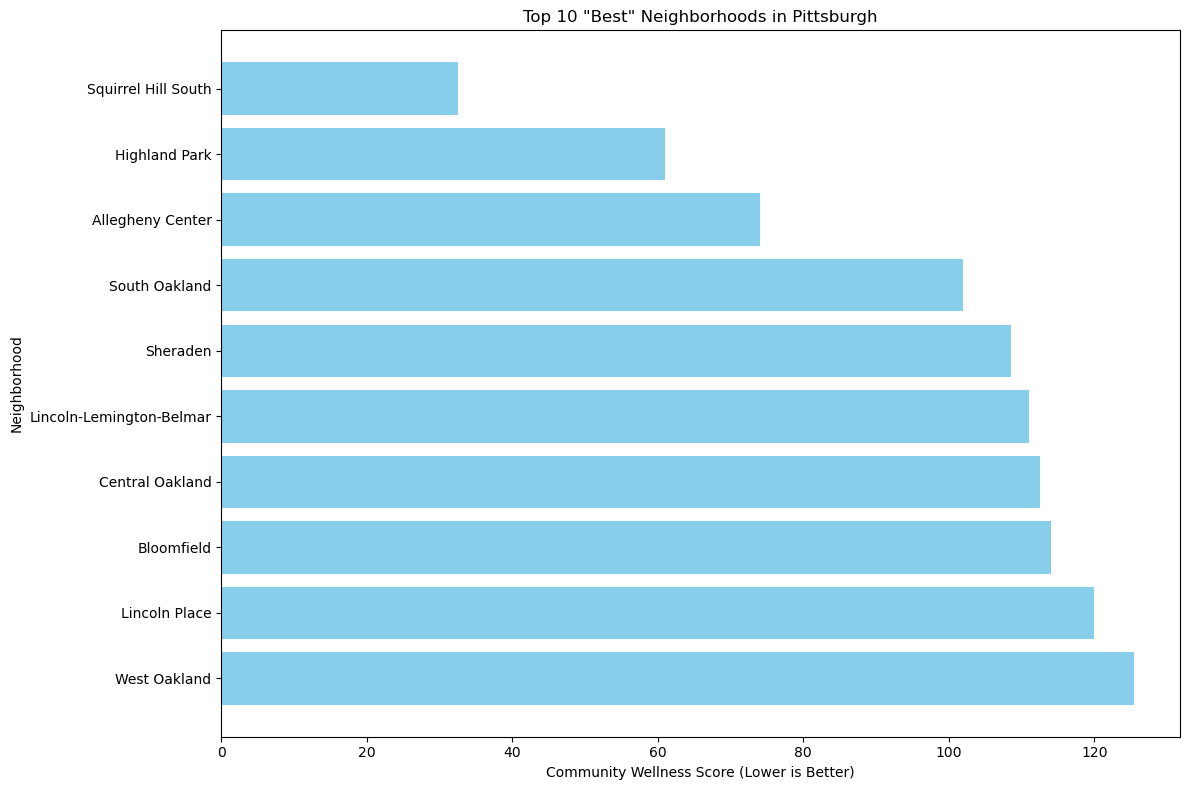

In [13]:
# 5. Final Visualization

# Get the Top 10 neighborhoods from our final_ranking dataframe
# We sort by FINAL_SCORE (ascending=False) *here* so the bar chart is in order from best (top) to 10th-best (bottom)
top_10 = final_ranking.head(10).sort_values(by='FINAL_SCORE', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10['neighborhood'], top_10['FINAL_SCORE'], color='skyblue')
plt.xlabel('Community Wellness Score (Lower is Better)')
plt.ylabel('Neighborhood')
plt.title('Top 10 "Best" Neighborhoods in Pittsburgh')
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Save the figure to a file (good practice for your repository)
plt.savefig('neighborhood_ranks.png')

# Show the plot
plt.show()

## 5. Conclusion & Reflections

> ****

In conclusion, our data-driven approach identified **Squirrel Hill South** as the "best" neighborhood in Pittsburgh, based on our "Community Wellness Score."

This project showed us how data can be used to analyze a complex, subjective question. It was interesting to see how different neighborhoods excelled in different areas. For example, Central Oakland was #1 in schooling but #7 overall, showing that a balanced score across all metrics was key to winning.


### Individual Reflections

**Anthony Hoang:**
> My analysis showed Central Oakland had the highest school enrollment ratio (Rank #1). While my metric's winner was different from the group's overall winner, it was cool to see Central Oakland still placed high in the top 10 (at #7) because of its strong age at death rank.

**Youssef Bey:**
> My playground analysis identified Squirrel Hill South as the #1 neighborhood, which ended up being our group's overall winner. This shows that public resources for families are a key part of what makes a neighborhood "best," and it was great to see the data back up the final result.

**Andrew Malfregeot:**
> My analysis found that Highland Park and South Side Flats tied for the best neighborhood for pools (Rank #1.5). I was surprised that Highland Park finished #2 in our group's final ranking, which shows that pools and playgrounds together are a strong indicator of a "best" neighborhood.

**Allan Verkhov:**
> My metric (median age at death) found Banksville to be #1, with Squirrel Hill South at #2. It's clear that the neighborhoods with the best health outcomes also tend to have the best community resources. Even though Banksville didn't make the final top 10, it shows that Squirrel Hill South is strong in both health *and* resources.

# Thank You!

**Questions?**